Task 1- Prediction Using Supervised ML

Problem: Predict the % of a student based on the no. of study hours.

Author: Aktchayaa Aravindalochanan

In [28]:
#Importing the Libraries required for the problem
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#reading data
data= pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [30]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [31]:

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


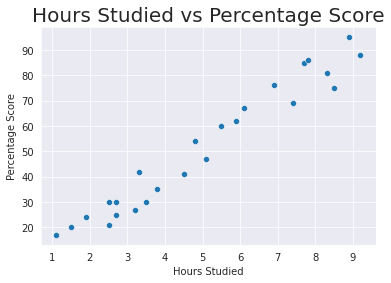

In [33]:
#Visualizing the data
sns.set_style('darkgrid')
sns.scatterplot(y=data['Scores'],x=data['Hours'])
plt.title('Hours Studied vs Percentage Score',size=20)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


From the above graph, we can see a positive linear relation between the hours studied and the percentage obtained(score).

Training the Model

1. Preparing the Data.

In [34]:
X =data.iloc[:, :-1].values  
y =data.iloc[:, 1].values

In [35]:
#the next step is to split this data into training and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.2, random_state=0)

In [36]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 


print("Training complete.")

Training complete.


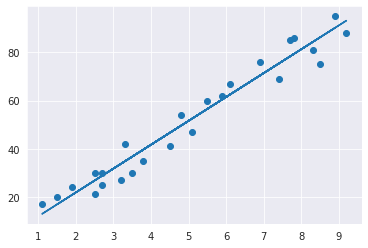

In [37]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [38]:
#Predicting the % score
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [39]:
#Comparing the result with acutal data.
df= pd.DataFrame({'ACTUAL' : y_test, 'PREDICTION' : y_pred})
df


,ACTUAL,PREDICTION
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [40]:
#Custom input(9.25 hours) and the prediction of %
hours = [9.25]
own_pred = regressor.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737539


In [41]:
#Evaluating the Model(Accuracy).
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
